In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display

In [3]:
sns.set_theme(style="darkgrid", palette="mako")

file_path = '../data/weather_data/weather_interpolated/parquet/'

def get_wind_farm_names(file_path):
    return [f.split('.')[0] for f in os.listdir(file_path) if f.endswith('.parquet')]

def read_farm_data(farm_name, file_path):
    full_path = os.path.join(file_path, f'{farm_name}.parquet')
    df = pd.read_parquet(full_path)
    df.index = pd.to_datetime(df.index)
    return df

def plot_data(df, variable, year, month, day):
    sns.set_palette("viridis")
    sns.set_context("talk")
    selected_date = pd.Timestamp(year=year, month=month, day=day)
    df_filtered = df[df.index.date == selected_date.date()]
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=df_filtered, x=df_filtered.index.strftime('%H:%M'), y=variable, linewidth=4)
    xticks_locs, xticks_labels = plt.xticks()
    plt.xticks(xticks_locs[::12], rotation=45)
    plt.xlabel('Time')
    plt.title(f"{variable} on {selected_date.strftime('%Y-%m-%d')}")
    plt.tight_layout()
    plt.show()

wind_farm_names = get_wind_farm_names(file_path)
default_farm = "ARWF1" if "ARWF1" in wind_farm_names else wind_farm_names[0]
description_width = 'initial'
wind_farm_dropdown = widgets.Dropdown(options=wind_farm_names, description='Wind Farm:', value=default_farm, layout=widgets.Layout(description_width=description_width))
weather_variable_dropdown = widgets.Dropdown(description='Weather Type:', layout=widgets.Layout(description_width=description_width))
date_picker = widgets.DatePicker(description='Pick a Date:', value=pd.to_datetime('2020-01-01'))
plot_button = widgets.Button(description='Plot Data')
output = widgets.Output()

def update_weather_variables(*args):
    farm_name = wind_farm_dropdown.value
    df = read_farm_data(farm_name, file_path)
    weather_variable_dropdown.options = list(df.columns)
    weather_variable_dropdown.value = 'temperature_2m' if 'temperature_2m' in df.columns else df.columns[0]

wind_farm_dropdown.observe(update_weather_variables, 'value')

def on_plot_button_clicked(b):
    with output:
        output.clear_output()
        farm_name = wind_farm_dropdown.value
        variable = weather_variable_dropdown.value
        date = date_picker.value
        df = read_farm_data(farm_name, file_path)
        if date and variable and df is not None:
            plot_data(df, variable, date.year, date.month, date.day)

plot_button.on_click(on_plot_button_clicked)

controls_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', width='70%')
controls = widgets.HBox([wind_farm_dropdown, weather_variable_dropdown, date_picker, plot_button], layout=controls_layout)

display(controls, output)

update_weather_variables()
on_plot_button_clicked(None)

Output()

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, Layout
from IPython.display import display

sns.set_theme(style="darkgrid", palette="mako")

file_path = '../data/weather_data/weather_interpolated/parquet/'

def get_wind_farm_names(file_path):
    return [f.split('.')[0] for f in os.listdir(file_path) if f.endswith('.parquet')]

def read_farm_data(farm_name, file_path):
    full_path = os.path.join(file_path, f'{farm_name}.parquet')
    df = pd.read_parquet(full_path)
    df.index = pd.to_datetime(df.index)
    return df

def plot_data(df, variable, year, month):
    fig, ax = plt.subplots(figsize=(17, 6))
    sns.set_palette("viridis")
    sns.set_context("talk")
    start_date = pd.Timestamp(year=year, month=month, day=1)
    end_date = start_date + pd.offsets.MonthEnd()
    df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]
    sns.lineplot(data=df_filtered, x=df_filtered.index, y=variable, linewidth=2, color='#165DB1', ax=ax)
    plt.xticks(rotation=45)
    plt.title(f"{variable} in {start_date.strftime('%Y-%m')}")
    plt.legend([],[], frameon=False)
    sns.despine()
    ax.set_xlabel('')
    ax.set_ylabel('')   
    plt.show()

wind_farm_names = get_wind_farm_names(file_path)
default_farm = "ARWF1" if "ARWF1" in wind_farm_names else wind_farm_names[0]
description_width = 'initial'
wind_farm_dropdown = widgets.Dropdown(options=wind_farm_names, description='Wind Farm:', value=default_farm, layout=widgets.Layout(description_width=description_width))
weather_variable_dropdown = widgets.Dropdown(description='Weather Type:', layout=widgets.Layout(description_width=description_width))
date_picker = widgets.DatePicker(description='Pick a Month:', value=pd.to_datetime('2020-01-01'))
plot_button = widgets.Button(description='Plot Data')
output = widgets.Output()

def update_weather_variables(*args):
    farm_name = wind_farm_dropdown.value
    df = read_farm_data(farm_name, file_path)
    weather_variable_dropdown.options = list(df.columns)
    weather_variable_dropdown.value = 'temperature_2m' if 'temperature_2m' in df.columns else df.columns[0]

wind_farm_dropdown.observe(update_weather_variables, 'value')

def on_plot_button_clicked(b):
    with output:
        output.clear_output()
        farm_name = wind_farm_dropdown.value
        variable = weather_variable_dropdown.value
        date = date_picker.value
        df = read_farm_data(farm_name, file_path)
        if date and variable and df is not None:
            plot_data(df, variable, date.year, date.month)

plot_button.on_click(on_plot_button_clicked)

controls_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', width='70%')
controls = widgets.HBox([wind_farm_dropdown, weather_variable_dropdown, date_picker, plot_button], layout=controls_layout)

display(controls, output)

update_weather_variables()
on_plot_button_clicked(None)

Output()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1.5})

def read_farm_weather_data(file_path):
    farm_files = [f for f in os.listdir(file_path) if f.endswith('.parquet')]
    farm_data = []
    for file in farm_files:
        full_path = os.path.join(file_path, file)
        df = pd.read_parquet(full_path)
        df.index = pd.to_datetime(df.index)
        df['Farm'] = file.split('.')[0] 
        farm_data.append(df)
    return pd.concat(farm_data)

def plot_weather_data(df, variable, year, month):
    df_filtered = df[df.index.month == month]
    df_filtered = df_filtered[df_filtered.index.year == year]

    palette = sns.color_palette("mako", 79)

    plt.figure(figsize=(20, 6))
    sns.lineplot(data=df_filtered, x=df_filtered.index, y=variable, hue='Farm', linewidth=1.5, palette=palette)

    plt.ylim(0, df_filtered[variable].max() * 1.1)
    sns.despine(left=True, bottom=True)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(f'')
    plt.ylabel(f'')
    plt.legend(title='Farm', loc='upper right', frameon=False).remove()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    file_path = '../data/weather_data/weather_interpolated/parquet/'
    variable = 'relative_humidity_2m'
    # temperature_2m
    # wind_direction_100m
    # wind_speed_100m
    # relative_humidity_2m
 
    
    year, month = 2022, 1

    df = read_farm_weather_data(file_path)
    if not df.empty:
        plot_weather_data(df, variable, year, month)


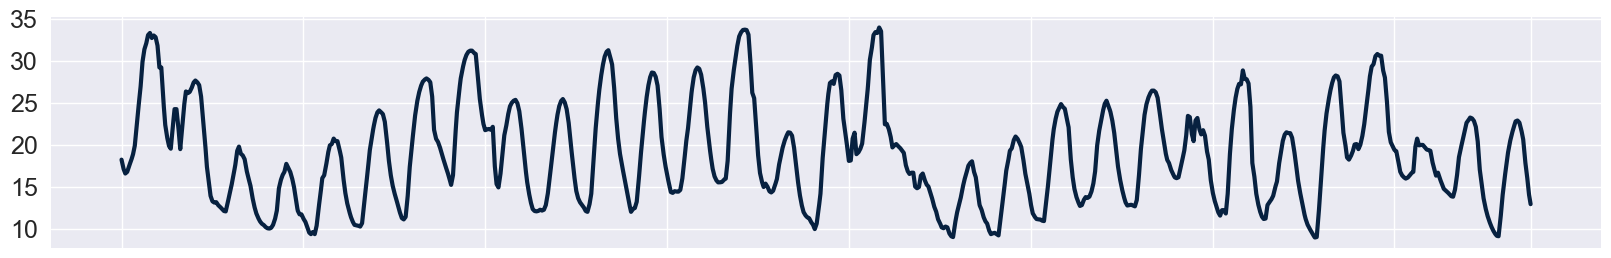

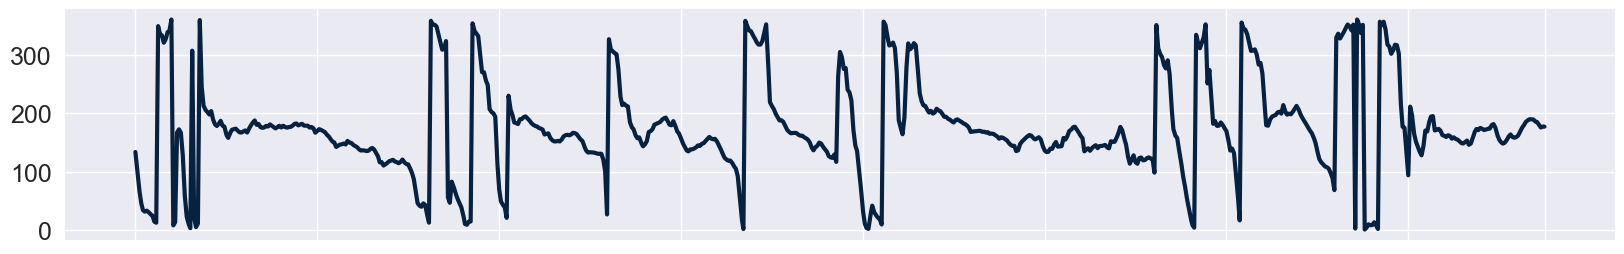

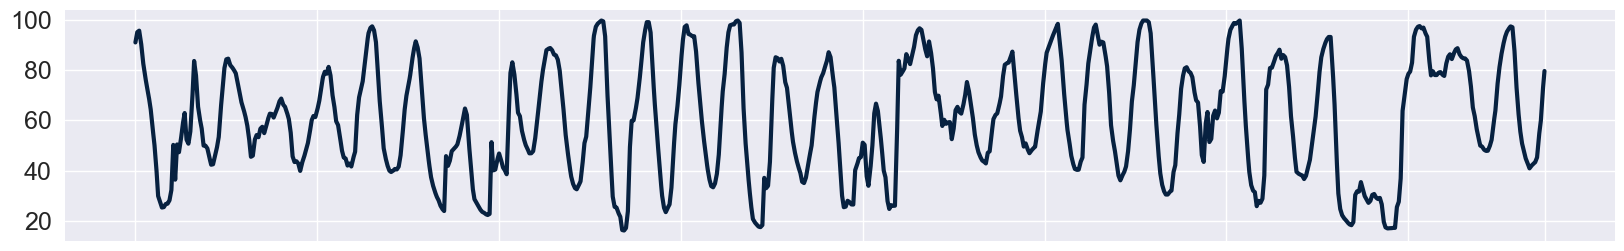

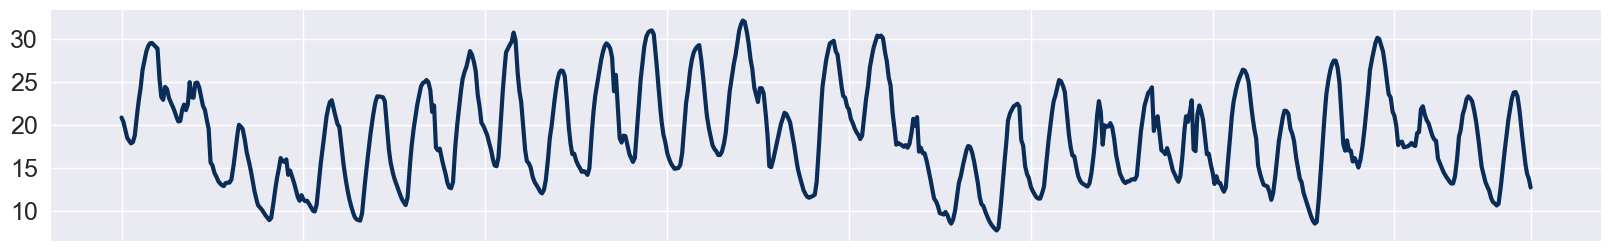

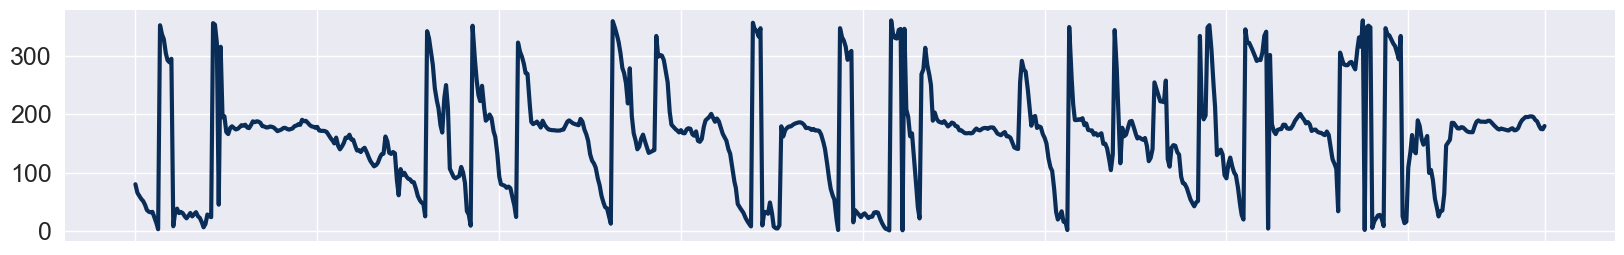

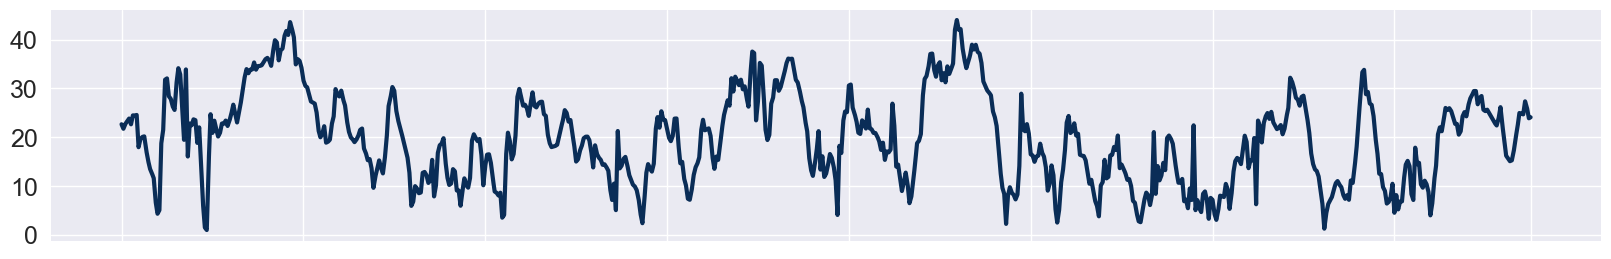

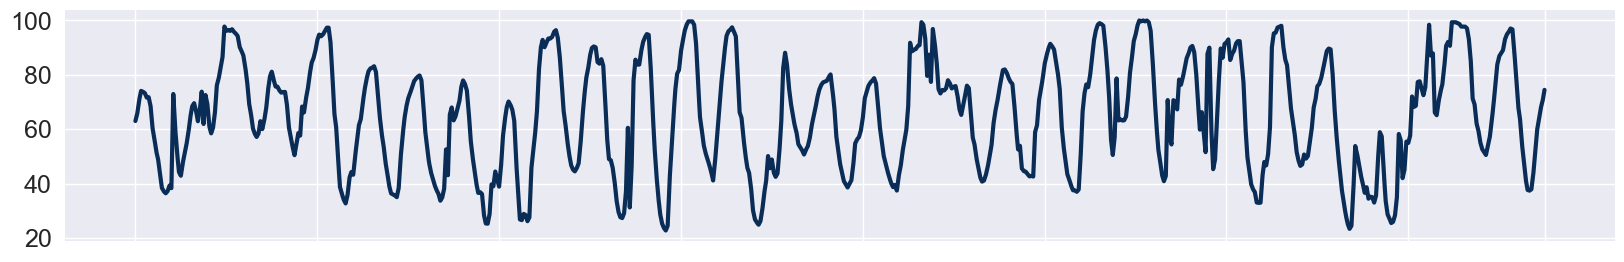

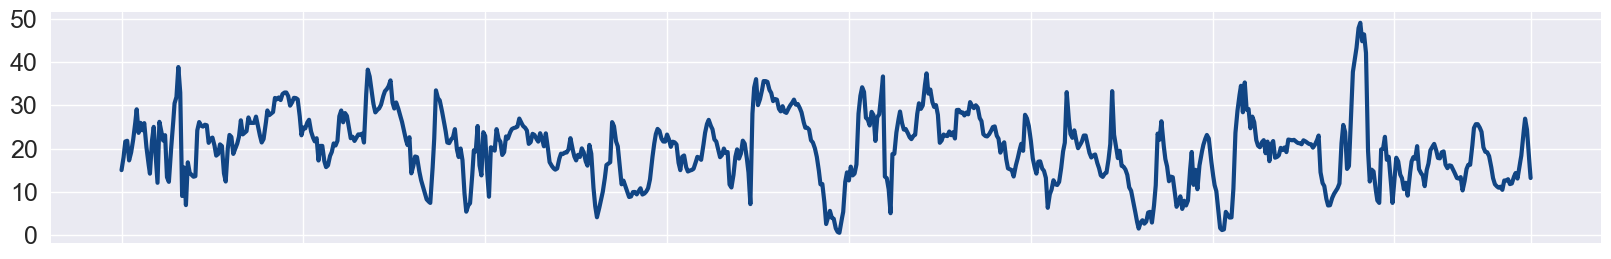

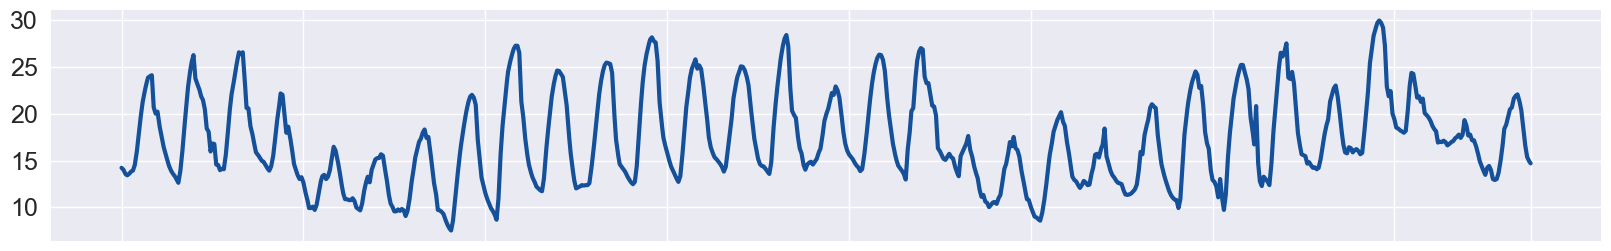

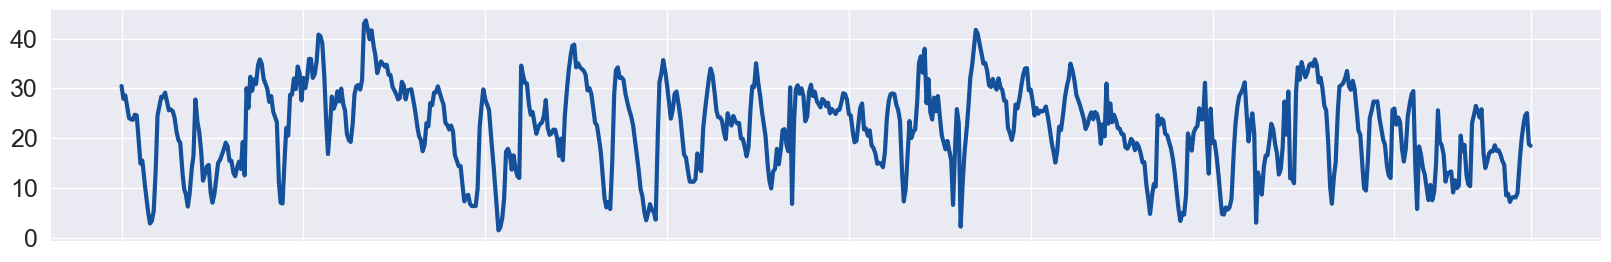

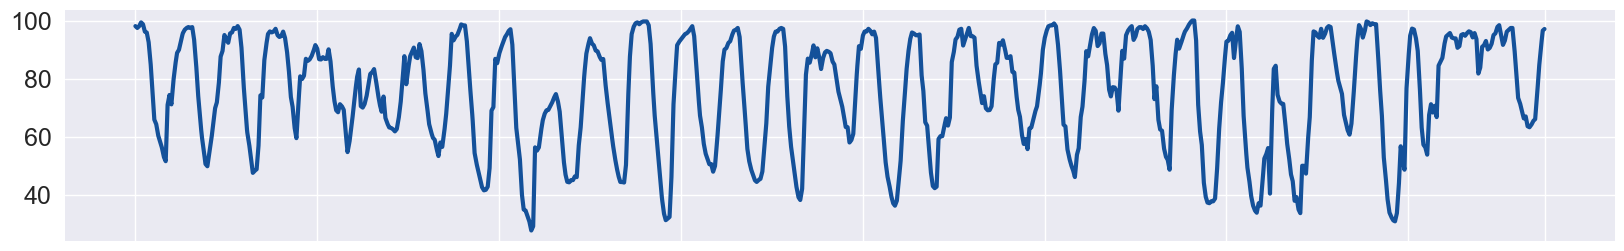

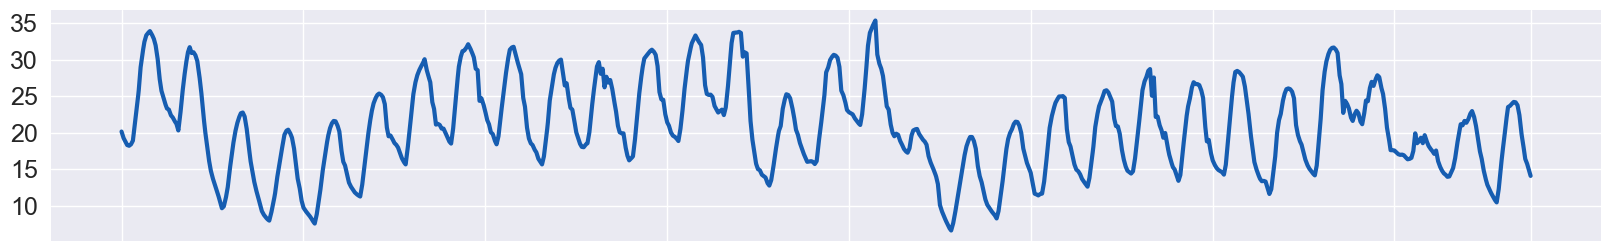

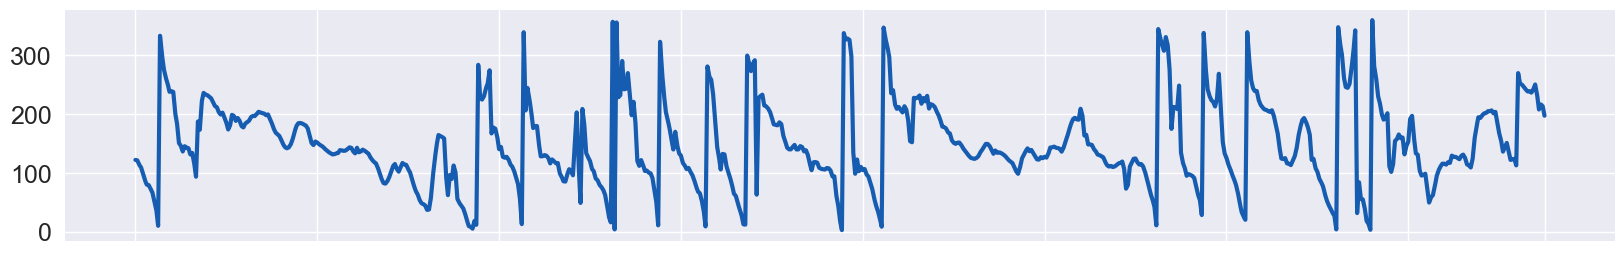

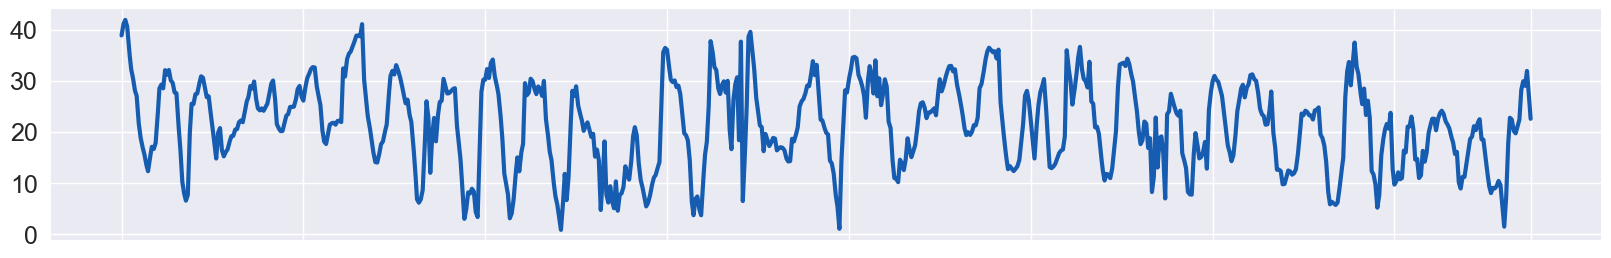

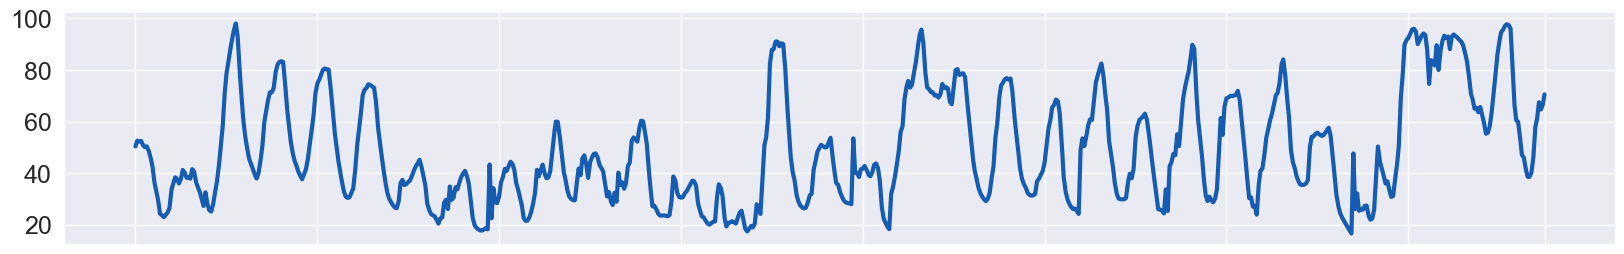

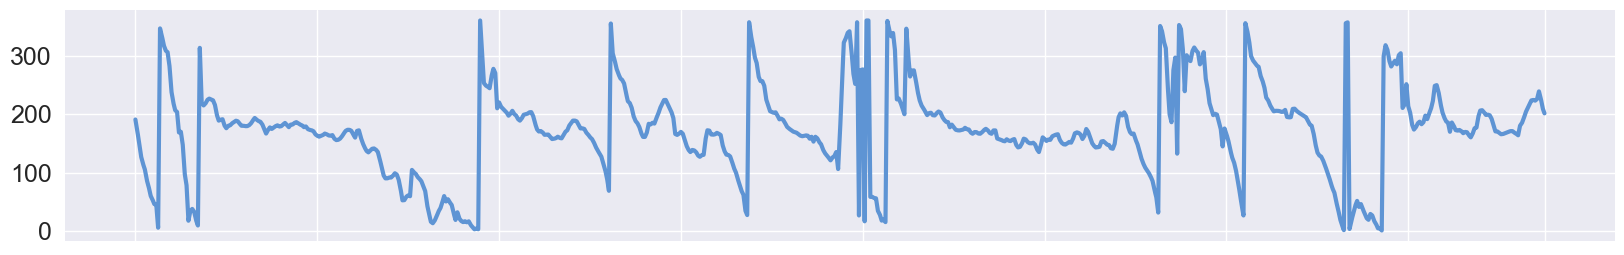

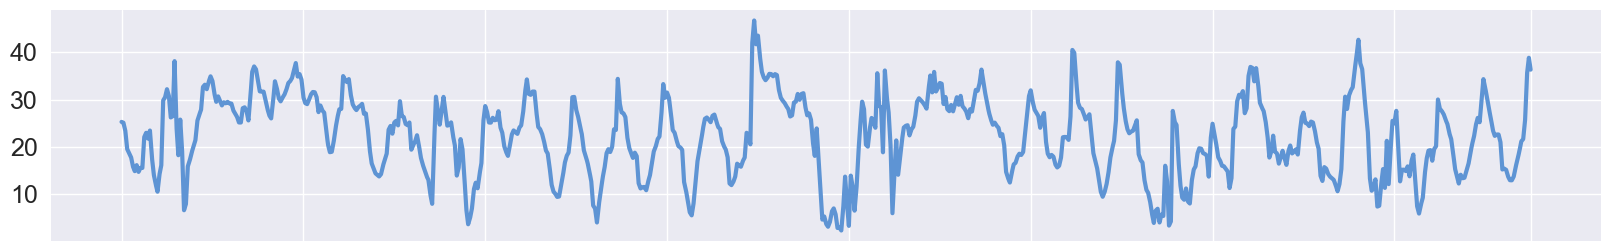

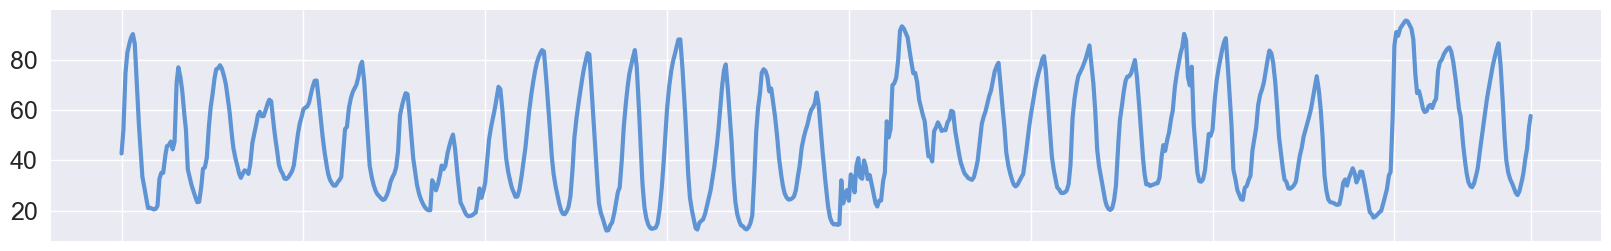

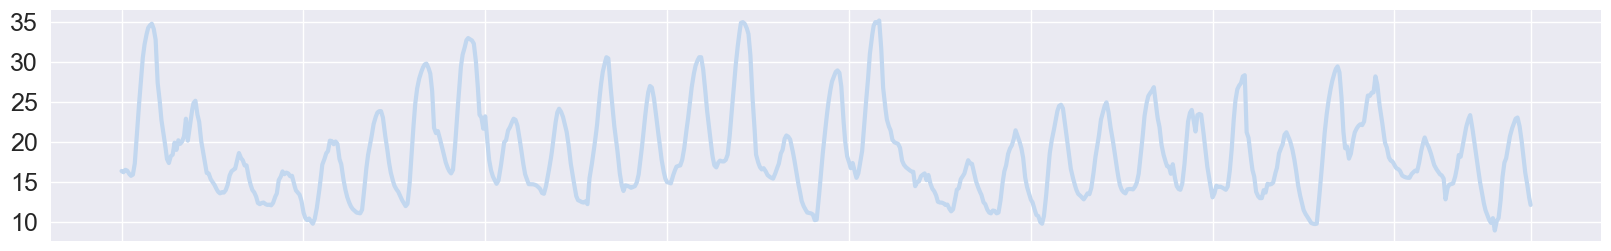

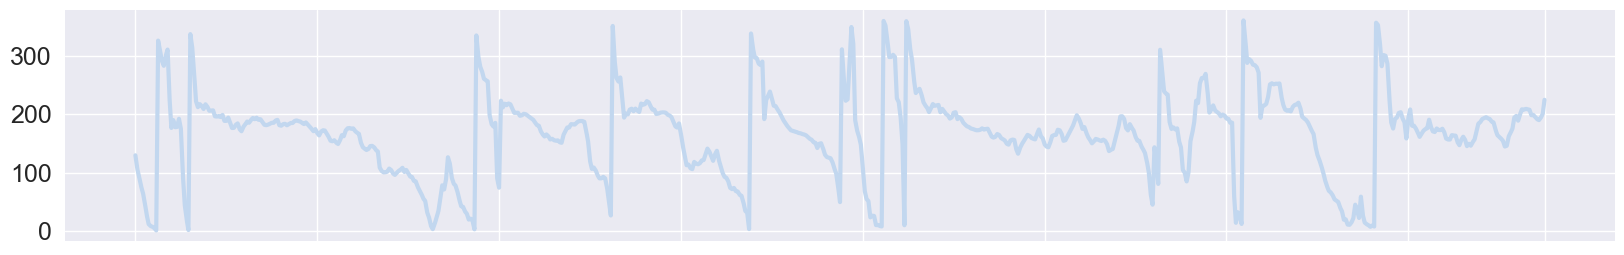

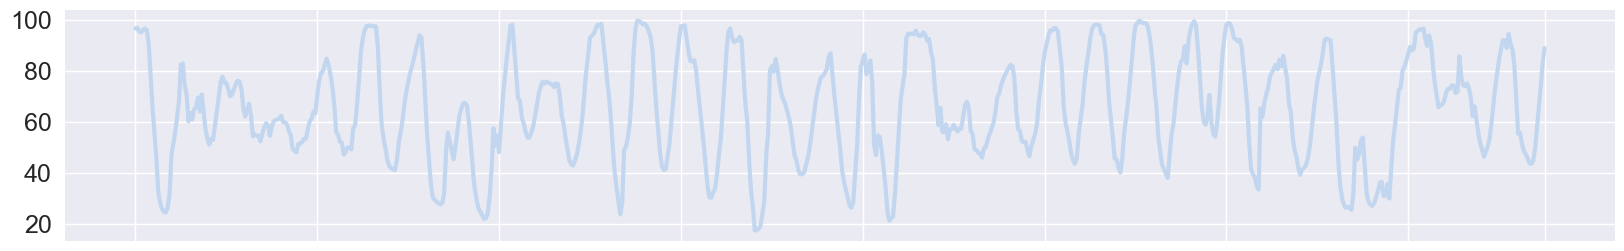

In [13]:
sns.set_theme(style="darkgrid", rc={'axes.grid': True})

def read_and_concatenate_weather_data(file_path):
    farm_files = [f for f in os.listdir(file_path) if f.endswith('.parquet')]
    farm_data = []
    for file in farm_files:
        full_path = os.path.join(file_path, file)
        df = pd.read_parquet(full_path)
        df['Time'] = pd.to_datetime(df.index)
        df['Farm'] = file.split('.')[0]
        farm_data.append(df)
    return pd.concat(farm_data, ignore_index=True)

def filter_and_plot_weather_data(df, farm, variable, year, month, color):
    df = df[(df['Farm'] == farm) & (df['Time'].dt.year == int(year)) & (df['Time'].dt.month == int(month))]

    plt.figure(figsize=(20, 3))
    sns.lineplot(data=df, x='Time', y=variable, color=color, linewidth=3)

    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=True, bottom=True)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    plt.yticks(fontsize=18)

    plt.show()

def visualize_weather_data(file_path, farms, variables, year, month, colors):
    df = read_and_concatenate_weather_data(file_path)
    for farm, color in zip(farms, colors):
        for variable in variables:
            filter_and_plot_weather_data(df, farm, variable, year, month, color)

if __name__ == "__main__":
    file_path = '../data/weather_data/weather_interpolated/parquet/'
    variables = ['temperature_2m', 'wind_direction_100m', 'wind_speed_100m', 'relative_humidity_2m']
    farms = ['CHALLHWF', 'CHYTWF1', 'COOPGWF1', 'DUNDWF1', 'GUNNING1', 'HALLWF1', 'KIATAWF1', 'SALTCRK1'] 
    colors = ['#072140', '#0A2D57', '#0E396E', '#114584', '#14519A', '#165DB1', '#5E94D4', '#C2D7EF']  
    year = '2023'
    month = '1'

    visualize_weather_data(file_path, farms, variables, year, month, colors)
